In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :019.high_variableGenes.ipynb
@说明        :
@时间        :2023/08/17 18:52:06
@作者        :Wu Baosheng
@版本        :1.0
'''

In [151]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import numpy as np
import re,sys,os
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/01.h5ad_counts/count_new')

In [153]:
def gene2Name():
    dic1 = {}
    path='H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/04.gene2names'
    for i in os.listdir(path):
        if i.endswith('.tsv'):
            # dic1 = {}
            sp = i.split('.')[0]
            print(sp)
            file =open(path+'/'+i,'r')
            for line in file:
                line = line.strip().split('\t')
                dic1[line[0]] = line[1]
                # dic2[sp] = dic1
            file.close()
        else:
            continue
    return dic1

In [154]:
def fasta2dict(fasta_file):
    fasta = {}
    with open(fasta_file) as f:
        for line in f:
            line = line.strip()
            if line.startswith(">"):
                name = line[1:]
                fasta[name] = ""
            else:
                fasta[name] += line
    return list(fasta.keys())

In [155]:
def readH5ad(adata_path):
    adata = sc.read_h5ad(adata_path)
    adata.X=adata.layers['counts']
    sc.pp.normalize_total(adata,target_sum=1e6,exclude_highly_expressed=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)
    adata = adata[:, adata.var['highly_variable']]
    high_variable_genes = adata.var.index.tolist()
    return high_variable_genes

In [156]:
gene_name =gene2Name()

bichir
chicken
dogshark
elephantshark
frog
Greenlizard
hagfish
human
lamprey
lancelet
lungfish
mouse


In [157]:
lancelet_high=readH5ad('H:/002.singcell/01.liver/01.lancelet/01.withoutSoupX/lancelet_counts.h5ad')

In [158]:
df_lancelet_rbh =pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/08.CommonTrans/06.lancelet/bflancelet_lancelet.RBH.txt',sep='\t',header=None,names=['bf','lancelet'],index_col=None)
df_lancelet_rbh['bf']=df_lancelet_rbh['bf'].apply(lambda x:x.split('_')[0])
df_lancelet_rbh['lancelet']=df_lancelet_rbh['lancelet'].astype('str')
bf_lancelet_dic = df_lancelet_rbh.set_index('lancelet').to_dict()['bf']

In [ ]:
for i in lancelet_high:
    if i in bf_lancelet_dic.keys():
        print(bf_lancelet_dic[i])

In [159]:
lamprey_high=readH5ad('./lamprey_counts.h5ad')

In [27]:
lamprey_genes = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/lamprey_dogshark.txt',header=None,names=['dogshark','lamprey'], index_col=None, sep='\t')['lamprey'].to_list()


In [36]:
len(lamprey_genes)

61

In [37]:
len(set(lamprey_high).intersection(set(lamprey_genes)))

6

In [160]:
dogshark_high=readH5ad('H:/002.singcell/01.liver/03.dogshark/04.intergrate/dogshark_counts.h5ad')
dogshark_genes = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/lamprey_dogshark.txt',header=None,names=['dogshark','lamprey'], index_col=None, sep='\t')['dogshark'].to_list()
len(set(dogshark_high).intersection(set(dogshark_genes)))

8

In [161]:
bichir_high=readH5ad('H:/002.singcell/01.liver/08.bichir/bichir_counts.h5ad')
bichir_genes = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/lamprey_bichir.txt',header=None,names=['bichir','lamprey'], index_col=None, sep='\t')['bichir'].to_list()
len(set(bichir_high).intersection(set(bichir_genes)))

1

In [162]:
lungfish_high=readH5ad('H:/002.singcell/01.liver/04.lungfish/lungfish_counts.h5ad')
lungfish_genes = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/lamprey_lungfish.txt',header=None,names=['lungfish','lamprey'], index_col=None, sep='\t')['lungfish'].to_list()
len(set(lungfish_high).intersection(set(lungfish_genes)))

10

In [163]:
frog_high=readH5ad('H:/002.singcell/01.liver/05.frog/frog_counts.h5ad')
frog_genes = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/lamprey_frog.txt',header=None,names=['frog','lamprey'], index_col=None, sep='\t')['frog'].to_list()
len(set(frog_high).intersection(set(frog_genes)))

9

In [164]:
human_high=readH5ad('H:/002.singcell/01.liver/07.Human/human_counts.h5ad')
human_genes = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/lamprey_human.txt',header=None,names=['human','lamprey'], index_col=None, sep='\t')['human'].to_list()
len(set(human_high).intersection(set(human_genes)))

4

In [14]:
human = pd.read_excel('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/Retrogenes.xlsx',header=0,index_col=None,sheet_name='human',engine='openpyxl')

In [15]:
set(human_high).intersection(set(human['genes'].to_list()))

{'CH25H'}

In [2]:
high_valiable_genes = {'R1':[619,302,356,265,283,302],
                       'R2':[0,396,586,486,413,497],
                       'denovo':[6,8,1,10,9,4],
                       'retrogenes':[0,0,0,0,0,1]}
df_genes = pd.DataFrame(high_valiable_genes, index=['Lamprey','bamboo shark','Senegal bichir','African lungﬁsh','African bullfrog','Human'])

In [4]:
df_genes['other']=2000-(df_genes['R1'] + df_genes['R2']+df_genes['denovo']+df_genes['retrogenes'])

In [5]:
#### df_genes每一个值除以该行的和
df_normalized = df_genes.div(df_genes.sum(axis=1), axis=0)


In [6]:
df_normalized=df_normalized.T

In [7]:
df_normalized

,Lamprey,bamboo shark,Senegal bichir,African lungﬁsh,African bullfrog,Human
R1,0.3095,0.151,0.1780,0.1325,0.1415,0.1510
R2,0.0000,0.198,0.2930,0.2430,0.2065,0.2485
denovo,0.0030,0.004,0.0005,0.0050,0.0045,0.0020
retrogenes,0.0000,0.000,0.0000,0.0000,0.0000,0.0005
other,0.6875,0.647,0.5285,0.6195,0.6475,0.5980


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objs as go
import plotly.express as px
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [9]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=6, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_normalized.index, values=df_normalized['Lamprey'],name="GHG Emissions"),row=1, col=1)
fig.add_trace(go.Pie(labels=df_normalized.index, values=df_normalized['bamboo shark'],name='bamboo shark'),row=1, col=2)
fig.add_trace(go.Pie(labels=df_normalized.index, values=df_normalized['Senegal bichir'], name='Senegal bichir'), row=1, col=3)
fig.add_trace(go.Pie(labels=df_normalized.index, values=df_normalized['African lungﬁsh'], name='African lungﬁsh'), row=1, col=4)
fig.add_trace(go.Pie(labels=df_normalized.index, values=df_normalized['African bullfrog'], name='African bullfrog'), row=1, col=5)
fig.add_trace(go.Pie(labels=df_normalized.index, values=df_normalized['Human'], name='Human'), row=1, col=6)
# fig.update_traces(hole=0, hoverinfo="label+percent+name")
fig.update_traces(hole=0, hoverinfo=None)
fig.show()
fig.write_image('H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/05.newGenes/new_genes.pdf')

In [3]:
df_development = {'e8':[184,447,1,8],
                  'e9':[200,402,2,10],
                  'e95_p':[211,409,3,3],
                  'e95a':[189,364,2,4]}
df_development = pd.DataFrame(df_development, index=['R1','R2','retro','denovo']).T

In [11]:
df_development['other'] = 2000-df_development.sum(axis=1)

In [13]:
df_development=df_development.T

In [15]:
df_development

,e8,e9,e95_p,e95a
R1,184.0,200.0,211.0,189.0
R2,447.0,402.0,409.0,364.0
retro,1.0,2.0,3.0,2.0
denovo,8.0,10.0,3.0,4.0
other,1360.0,1386.0,1374.0,1441.0


In [18]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_development.index, values=df_development['e8'],name="e8"),row=1, col=1)
fig.add_trace(go.Pie(labels=df_development.index, values=df_development['e9'],name='e9'),row=1, col=2)
fig.add_trace(go.Pie(labels=df_development.index, values=df_development['e95_p'], name='e95_p'), row=1, col=3)
fig.add_trace(go.Pie(labels=df_development.index, values=df_development['e95a'], name='e95a'), row=1, col=4)
# fig.update_traces(hole=0, hoverinfo="label+percent+name")
fig.update_traces(hole=0, hoverinfo=None)
fig.show()
fig.write_image('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/liver_development_new_genes.pdf')

In [2]:
new_cne = {'before':[6],
                  'vetebrate':[9],
                  'Jawed':[155],
                  'fish':[63],'Amniote':[146],'Mammalia':[577]}
df_new_cne = pd.DataFrame(new_cne, index=['counts']).T

In [4]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_new_cne.index, values=df_new_cne['counts'],name="counts",pull=[0, 0.2, 0,0,0,0]),row=1, col=1)
fig.write_image('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/014.mouse_liver_development/liver_CNE.pdf')

In [12]:
lamprey=sc.read('H:/002.singcell/01.liver/02.lampery/lamprey.integrate_cell_type.h5ad')

In [18]:
lamprey.obs['cell type']

AAACCCAAGAAATTCG-1-liver1             Lymphoid cell
AAACCCAAGATGACAT-1-liver1           Endothelia cell
AAACCCAAGCCATCCG-1-liver1                Hepatocyte
AAACCCAAGGGTCAAC-1-liver1           Endothelia cell
AAACCCAAGTGCTCAT-1-liver1           Endothelia cell
                                      ...          
TTTGTTGCACTGATTG-1-liver2           Endothelia cell
TTTGTTGGTATTAAGG-1-liver2    Hepatic stellate cells
TTTGTTGGTCGACTTA-1-liver2                   unknocw
TTTGTTGGTTCCTTGC-1-liver2           Endothelia cell
TTTGTTGTCTTCTAAC-1-liver2           Endothelia cell
Name: cell type, Length: 19073, dtype: category
Categories (7, object): ['Cholangiocyte', 'Endothelia cell', 'Hepatic stellate cells', 'Hepatocyte', 'Lymphoid cell', 'Macrophage', 'unknocw']

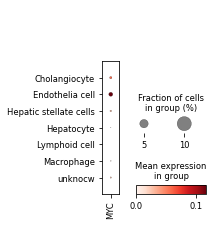

In [20]:
sc.pl.dotplot(lamprey,['MYC'],groupby='cell type')

In [166]:
high_all_genes = []
for x in lamprey_high+dogshark_high+lungfish_high+bichir_high+frog_high+human_high:
    if x in gene_name.keys():
        high_all_genes.append(gene_name[x])
vertebrate_high = []
for x in set(high_all_genes):
    if high_all_genes.count(x) >= 3:
        vertebrate_high.append(x)

In [167]:
len(vertebrate_high)

739

In [256]:
high_all_genes = []
for x in lamprey_high+dogshark_high+lungfish_high+bichir_high+frog_high+human_high:
    if x in gene_name.keys():
        high_all_genes.append(gene_name[x])
vertebrate_high2 = []
for x in set(high_all_genes):
    if high_all_genes.count(x) >= 6:
        vertebrate_high2.append(x)

In [257]:
len(vertebrate_high2)

80

In [ ]:
for x in vertebrate_high:
    print(x)

In [168]:
human_2R = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/human.Pairs.Intermediate.2R.txt',sep='\t',header=0,index_col=None)

In [169]:
R1=set(human_2R['Symbol1'].to_list()).intersection(set(vertebrate_high))
R2=set(human_2R['Symbol2'].to_list()).intersection(set(vertebrate_high))

In [170]:
print(f'the high R1:{len(R1)}\nthe high R2:{len(R2)}')

the high R1:226
the high R2:220


In [171]:
len(set(R1).intersection(set(R2)))

103

In [172]:
print(len(set(human_2R['Symbol1'].to_list())))
print(len(set(human_2R['Symbol2'].to_list())))

3708
3672


In [200]:
len(set(human_2R['Symbol1'].to_list()).intersection(set(human_2R['Symbol2'].to_list())))

1420

In [201]:
human_2R

,Ohno1,Ohno2,Symbol1,Symbol2,Og weighted global mean,Self weighted global mean,Outgroup Support,Duplication time,Gene type
0,ENSG00000164236,ENSG00000167612,ANKRD33B,ANKRD33,1.592424e-04,1.329170e-08,2.0,Vertebrata,protein_coding
1,ENSG00000147465,ENSG00000010270,STAR,STARD3NL,6.313951e-05,2.230453e-04,4.0,Vertebrata,protein_coding
2,ENSG00000095464,ENSG00000132915,PDE6C,PDE6A,1.290518e-09,1.249648e-13,1.0,Vertebrata,protein_coding
3,ENSG00000078804,ENSG00000164938,TP53INP2,TP53INP1,2.431218e-06,3.374232e-24,2.0,Vertebrata,protein_coding
4,ENSG00000155744,ENSG00000122591,FAM126B,FAM126A,1.899786e-05,9.903332e-34,3.0,Vertebrata,protein_coding
...,...,...,...,...,...,...,...,...,...
5639,ENSG00000172352,ENSG00000166446,CDY1B,CDYL2,6.726989e-04,8.291722e-17,NaN,Vertebrata,protein_coding
5640,ENSG00000273554,ENSG00000132164,AC136616.1,SLC6A11,5.881828e-04,2.370274e-23,NaN,Vertebrata,protein_coding
5641,ENSG00000010379,ENSG00000273554,SLC6A13,AC136616.1,1.274947e-03,8.271787e-19,NaN,Vertebrata,protein_coding
5642,ENSG00000111181,ENSG00000273554,SLC6A12,AC136616.1,4.454568e-03,1.140506e-14,NaN,Vertebrata,protein_coding


In [173]:
def gene2Name():
    dic2 = {}
    path='H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/04.gene2names'
    for i in os.listdir(path):
        if i.endswith('.tsv'):
            dic1 = {}
            sp = i.split('.')[0]
            file =open(path+'/'+i,'r')
            for line in file:
                line = line.strip().split('\t')
                dic1[line[0]] = line[1]
                dic2[sp] = dic1
            file.close()
        else:
            continue
    return dic2
gene_name2 = gene2Name()

In [174]:
gene_name2.keys()

dict_keys(['bichir', 'chicken', 'dogshark', 'elephantshark', 'frog', 'Greenlizard', 'hagfish', 'human', 'lamprey', 'lancelet', 'lungfish', 'mouse'])

In [175]:
all_gene = []
for x in gene_name2.keys():
    if x in ['bichir','dogshark','frog','human','lamprey','lungfish']:
        for y in gene_name2[x].keys():
            all_gene.append(gene_name2[x][y])

In [176]:
homo_gene = []
for x in set(all_gene):
    if all_gene.count(x)>=3:
        homo_gene.append(x)

In [31]:
len(homo_gene)

14609

In [177]:
human_R1_R2 = human_2R['Symbol1'].to_list() + human_2R['Symbol2'].to_list()
human_R1_R2 = list(set(human_R1_R2))
wgd_gene = []
for x in ['bichir','dogshark','frog','lamprey','human','lungfish']:
    tmp = []
    print(x)
    for y in gene_name2[x]:
        if gene_name2[x][y] in human_R1_R2:
            tmp.append(gene_name2[x][y])
        else:
            pass
    wgd_gene = wgd_gene + list(set(tmp))

bichir
dogshark
frog
lamprey
human
lungfish


In [178]:
selected_wgd_gene=[]
for x in set(wgd_gene):
    if wgd_gene.count(x) >=3:
        selected_wgd_gene.append(x)

In [179]:
len(selected_wgd_gene)

4984

In [180]:
def fisherExactForOverlap(overlap_value,set1,set2,background_value):
    from scipy.stats import fisher_exact
    table=[[overlap_value,set1-overlap_value],[set2-overlap_value,background_value-(set1+set2)+overlap_value]]
    return fisher_exact(table)

In [253]:
fisherExactForOverlap(342,739,4989,14609)  

(1.7097599328729187, 3.3139336904639815e-12)

In [182]:
df1 = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/13.homoGenes/human_2R.txt',header=0,index_col=None,sep='\t')

In [183]:
human = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/13.homoGenes/human.homoGenes.txt',sep='\t',header=0,index_col=0)
human.fillna('no value', inplace=True)
human_wgd = []
for index, row in human.iterrows():
    if row['lancelet']== 'no value':
        line = row['human'].split(',')
        line2 = [x.strip() for x in line]
        human_wgd = human_wgd + line2
    else:
        tmp =len(row['human'].split(','))-len(row['lancelet'].split(','))
        line = row['human'].split(',')
        line2 = [x.strip() for x in line]
        human_wgd = human_wgd + line2[tmp: ]

In [184]:
df_R1=pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/13.homoGenes/human_2R.txt',header=0,index_col=None,sep='\t')
df_R1.fillna('no value', inplace=True)
R2_1 = []
for index, row in df_R1.iterrows():
    if row['lamprey']== 'no value':
        line = row['human'].split(',')
        line2 = [x.strip() for x in line]
        R2_1 = R2_1 + line2
    else:
        tmp =len(row['human'].split(','))-len(row['lamprey'].split(','))
        line = row['human'].split(',')
        line2 = [x.strip() for x in line]
        R2_1 = R2_1 + line2[tmp: ]

In [185]:
R1_1=[x for x in human_wgd if x not in R2_1]
R1_1=[x.upper() for x in R1_1]
R2_1=[x.upper() for x in R2_1]

In [186]:
len(R1_1)

2056

In [187]:
human_R1_R2_1 = list(set(R1_1 + R2_1))
t = []
for x in ['bichir','dogshark','frog','lamprey','human','lungfish']:
    tmp = []
    print(x)
    for y in gene_name2[x]:
        if gene_name2[x][y] in human_R1_R2_1:
            tmp.append(gene_name2[x][y])
        else:
            pass
    t = t + list(set(tmp))

bichir
dogshark
frog
lamprey
human
lungfish


In [188]:
selected_wgd_gene_1=[]
for x in set(t):
    if t.count(x) >=3:
        selected_wgd_gene_1.append(x)

In [199]:
len(set(R1_1).intersection(set(vertebrate_high)))

152

In [190]:
len(set(R2_1).intersection(set(vertebrate_high)))


160

In [191]:
ancient_genes_high=set(vertebrate_high)-set(R2)-set(R1)

In [192]:
lancelet_high=['LOC'+x for x in lancelet_high]

In [193]:
lancelet_high_names =[]
for x in lancelet_high:
    if x in gene_name2['lancelet'].keys():
        lancelet_high_names.append(gene_name2['lancelet'][x])

In [194]:
ancient_lancelet_high = set(lancelet_high_names).intersection(ancient_genes_high)

In [195]:
ancient_vertebrate_high = set(ancient_genes_high)-ancient_lancelet_high

In [ ]:
for x in ancient_vertebrate_high:
    print(x)

In [92]:
def find_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None
tmp1 = [find_key_by_value(gene_name2['lancelet'],x) for x in ancient_lancelet_high]


In [ ]:
tmp2 = []
for x in tmp1:
    x = re.search(r'LOC(\d+)',x).group(1)
    if x in bf_lancelet_dic.keys():
        print(x)
        tmp2.append(bf_lancelet_dic[x])

In [255]:
for x in ancient_vertebrate_high:
    print(x)

AC097634.4
LRRIQ1
CTSK
TUBA1A
GCH1
S1PR3
HSPA8
CH25H
FREM1
DCDC2
RGS9
ZP3
PRG3
RBP4
IGLL1
SLC6A19
LTC4S
STK17A
APOE
GPR4
PLBD1
MCC
WDR17
ANKFN1
ZNF335
RNF220
HEG1
RTL1
ZNF366
NPR3
SHISA9
MEGF6
KNG1
ZNF665
CCDC80
CRP
GPNMB
IGHD
TNNC1
CDKL1
CARTPT
DNASE1L3
BMPR2
TUBB3
PTPRM
KIF21B
CXCR1
HLA
MAG
VPREB1
STAB2
CLEC4E
PARP14
EPHX1
SULT2B1
NIBAN1
ADAMTS17
CXCL8
NECTIN1
IGKV1
NLRP3
PTPN22
SPIC
LPAR6
STAB1
COL6A2
GNMT
TENT5A
ZFP2
IGKV2D
AXL
BMP10
TRIM14
TRIM16
CDHR3
MMRN2
TIMD4
NUMA1
CYP2A13
METTL24
CALD1
SEMA3D
P2RY8
LIFR
HLX
AFAP1
CCL19
CXCL10
PDGFA
CYSLTR1
ESM1
ADGRF5
PDIA2
PTPRB
CENPF
TMTC2
BICDL1
TRIM69
CXCR4
MCPH1
SLC24A3
C1QTNF12
WT1
ANKK1
VCAM1
NTSR1
SNCG
NTRK2
FRK
ADM
NLRP12
MID1IP1
GPR55
CENPE
NECAB1
CHRNA4
HBE1
HPX
FGFRL1
KRT17
SPEF1
NRP2
SEMA3G
IGHV3
CCN1
ANGPT1
SERPINF2
ACSBG1
GFRA1
COL21A1
PTN
KRT18
CCL20
CCN4
B3GNT3
CCR6
ADAMTSL3
HMOX1
GZMH
ZCCHC3
BICC1
AGR3
PTGIR
CASR
IFI44L
PVALB
CD276
ZP2
PLK2
ENTPD1
RHOB
CYP1B1
SERPINA1
FCRL5
KLF1
EFCC1
NR2F1
ZBED4
CD163
SNCAIP
ZBED6
WNT4
KAN

In [254]:
len(ancient_vertebrate_high)

331

In [261]:
for x in set(vertebrate_high2).intersection(set(ancient_vertebrate_high)):
    print(x)

TUBA1A
URGCP
HLA
NRP2
VPREB1
IGHV3
SERPINA1
FCRL5
CCN1
IGLL1
OLFM4
TIGD1
ZBED4
COL21A1
CD163
TRIM69
FETUB
TRIM39
LTBP1
NLRP3
GZMA
IGKV1
VMO1
RTL1
IGLL5
CTSL
GZMH
TRIM25
MYH1
ZCCHC3
TRIM16
CASR
CRP
IGHD
PRF1
PTPRM
PLK2


In [124]:
df_enhancer = pd.read_csv('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/015.enhancer/enhancer_liver.csv',sep=',',header=0,index_col=None)

In [127]:
df_enhancer=df_enhancer[df_enhancer['TargetGene'].isin(ancient_vertebrate_high)]

In [131]:
df_enhancer.drop_duplicates(subset=['name'],inplace=True)

C:\Users\wubaosheng\AppData\Local\Temp\ipykernel_23704\535442118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enhancer.drop_duplicates(subset=['name'],inplace=True)


In [133]:
from Bio import SeqIO
from Bio.Seq import Seq
human_dir={}
records = SeqIO.parse("H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/015.enhancer/hg19.fa", "fasta")
for record in records:
    id = record.id
    seq = record.seq
    human_dir[id] = seq

In [134]:
file = open('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/015.enhancer/hg19.fa.fai','r')
chr_info = {}
for line in file:
    line = line.strip().split(',')[0].split(' ')
    nc = line[0][1: ]
    chr =line[-1]
    if chr != 'mitochondrion':
        id = 'chr' + chr
        chr_info[id] = nc

In [137]:
tmp =[]
table = open('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/liver_enhancer2.fa','w')
for index,row in df_enhancer.iterrows():
    name = row['name']
    start = row['start']
    end = row['end']
    chr = row['chr']
    id = name + '|' + 'chr'+ "_" + str(start) + '_' + str(end)
    seq = human_dir[chr_info[chr]][start-1:end]
    if id not in tmp:
        table.write('>'+id+'\n')
        table.write(str(seq).upper()+'\n')
        if len(str(seq)) == 0:
            print(name)
        tmp.append(id)
    else:
        pass
table.close()

In [ ]:
for x in ancient_vertebrate_high:
    print(x)

In [ ]:
df_gene = pd.DataFrame({'type':['overlap_R1','overlap_R2',]})

In [209]:
table = open('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/human_2R_genes.txt','w')
for x in set(human_2R['Symbol1'].to_list() + human_2R['Symbol2'].to_list()):
    table.writelines(str(x)+'\n')
table.close()

In [210]:
hagfish=pd.read_csv("H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/human2R_hagfish.txt",sep='\t',header=0,index_col=None)

In [212]:
hagfish.fillna('no value',inplace=True)

In [229]:
total_R1=[]
total_R2=[]
for index,row in hagfish.iterrows():
    if row['Last common ancestor with Hagfish']=='Vertebrata'or row['Last common ancestor with Lamprey']=='Vertebrata':
        total_R1.append(row['Gene name'])
    else:
        total_R2.append(row['Gene name'])
    



In [231]:
len(set(vertebrate_high).intersection(set(total_R1)))

246

In [230]:
len(set(vertebrate_high).intersection(set(total_R2)))

106

In [234]:
overlap =set(vertebrate_high).intersection(set(total_R1)).intersection(set(total_R2))

In [241]:
final_R2=[x for x in total_R2 if x not in overlap]
final_R1 = set(total_R1)
final_R2 = set(final_R2)

In [242]:
len(set(final_R1))

3389

In [243]:
len(set(final_R2))

2524

In [245]:
len(set(vertebrate_high).intersection(set(final_R1)))

246

In [248]:
len(set(vertebrate_high).intersection(set(final_R2)))

96

In [ ]:
table = open('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/human_R1_genes.txt','w')
for x in set(final_R1):
    table.writelines(str(x)+'\n')
table.close()

In [249]:
import plotly.express as px
from plotly.subplots import make_subplots
x=['overlap_R1','overlap_R2','vertebrateHVG','R1','R2','vertebrate_homo']
y=[246,96,739,3389,2524,14609]
fig=px.bar(x=x,y=y)
fig.show()


In [251]:
import plotly.express as px
from plotly.subplots import make_subplots
x=['overlap_R1','overlap_R2','vertebrateHVG']
y=[246,96,739]
fig=px.bar(x=x,y=y)
fig.show()
fig.write_image('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/R1+R2.pdf')

In [252]:
import plotly.express as px
from plotly.subplots import make_subplots
x=['R1','R2','vertebrate_homo']
y=[3389,2524,14609]
fig=px.bar(x=x,y=y)
fig.show()
fig.write_image('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/017. HVGs/R1+R2+homo.pdf')